In [1]:
import sys, os, glob, h5py
import time, datetime
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
import PyMKID_USRP_functions as PUf
import PyMKID_resolution_functions as Prf
import TimestreamHelperFunctions as Thf

In [3]:
## MB Results come from fitting a temperature scan at a specified RF power
MB_fit_vals = np.array([4.24216+9.75e-6, 
                        0.177  ,
                        0.0125 ,
                        4.1e7  ]) ## [ F0 [GHz] , Delta , alpha , Qi0 ]

In [4]:
series_list = np.array([
    "20220526_153840" , 
    "20220526_154021" , 
    "20220526_154151" , 
    "20220526_154322" , 
    "20220526_155108" , 
    "20220526_155237" , 
    "20220526_155408" , 
    "20220526_155540" , 
    "20220526_155708" , 
    "20220526_155837" 
])

P_min = -70 ; P_max = -25 ; P_step = 5
powers_list = np.arange(start=P_max, stop=P_min-P_step, step=-P_step)

In [5]:
for i in np.arange(len(series_list)):
    print(series_list[i], ":", powers_list[i], "dBc")

20220526_153840 : -25 dBc
20220526_154021 : -30 dBc
20220526_154151 : -35 dBc
20220526_154322 : -40 dBc
20220526_155108 : -45 dBc
20220526_155237 : -50 dBc
20220526_155408 : -55 dBc
20220526_155540 : -60 dBc
20220526_155708 : -65 dBc
20220526_155837 : -70 dBc


In [7]:
sum_file, dly_file, vna_file, tone_files = Thf.GetFiles(series_list[0], verbose=True)
metadata, avg_frqs, avg_S21s = Thf.UnpackSummary(sum_file)

Line Delay file:  /data/USRP_Noise_Scans/20220526/20220526_153840/USRP_Delay_20220526_153840.h5
VNA scan file:    /data/USRP_Noise_Scans/20220526/20220526_153840/USRP_VNA_20220526_153840.h5
Timestream files: ['/data/USRP_Noise_Scans/20220526/20220526_153840/USRP_Noise_20220526_153840_delta0.h5']
Summary file:	 /data/USRP_Noise_Scans/20220526/20220526_153840/noise_averages_20220526_153840.h5


Will separate data into  1000 chunks to achieve the requested 1.00e+02  Hz low  end of the PSD
Additional decimation by 20 needed to achieve the requested 5.00e+04  Hz high end of the PSD
Will convert to resonator basis!
Will convert to quasiparticle basis!
doing additional decimation
sampling frequency plugged into welch is 50000
pulse time data already exists! If you set override=False, nothing will happen.
saving pulse time data to /data/USRP_Noise_Scans/20220526/20220526_153840/USRP_Noise_20220526_153840_delta0.h5 because override=True!
found 141 pulses
chunk length plugged into welch is 500
chunked data into 1000 timestreams
computed electronics basis
cleaning...
(2, 398000)
(1, 398000)
(1, 398000)
(2, 398000)
(1, 398000)
(1, 398000)
0.0598313272782583
0.4012665378917112
saving clean_data to /data/USRP_Noise_Scans/20220526/20220526_153840/USRP_Noise_20220526_153840_delta0_cleaned.h5 because override=True!
number of chunks used to average is 796
Converting to resonator basis!
Conve

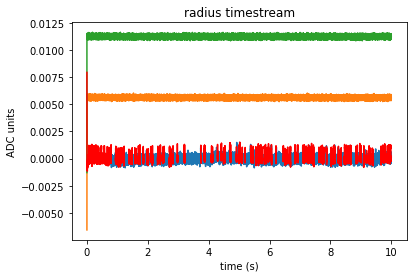

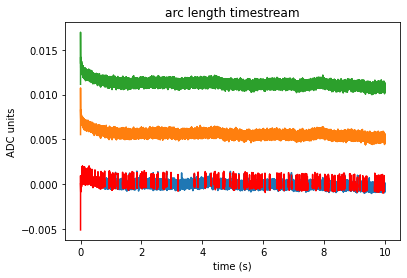

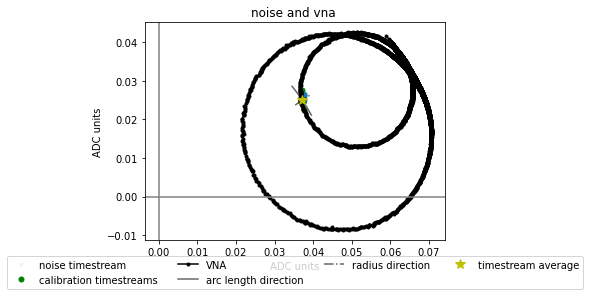

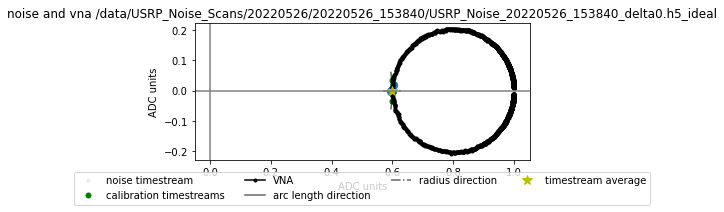

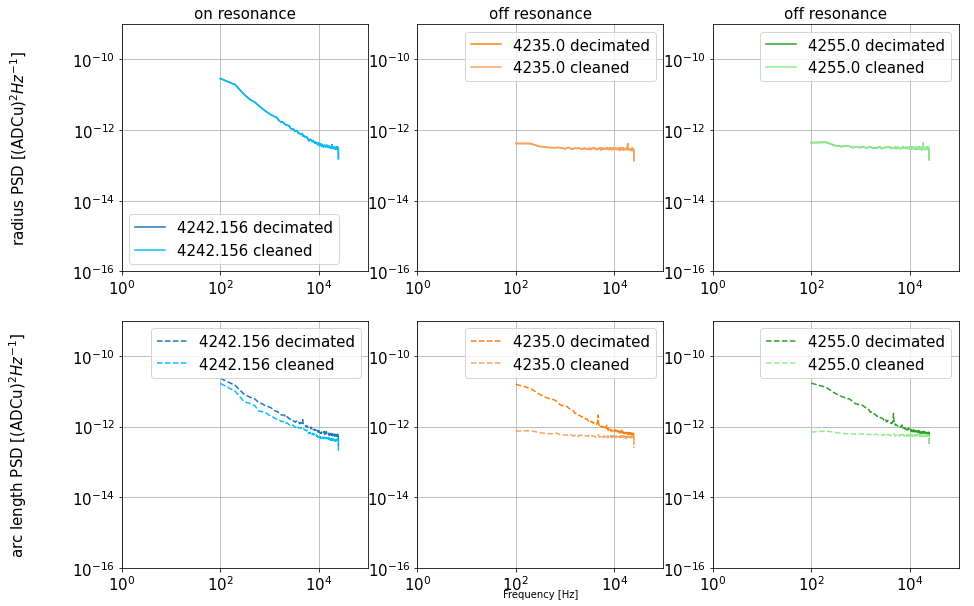

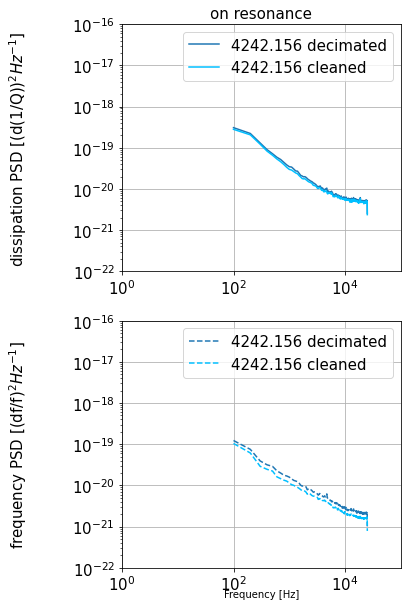

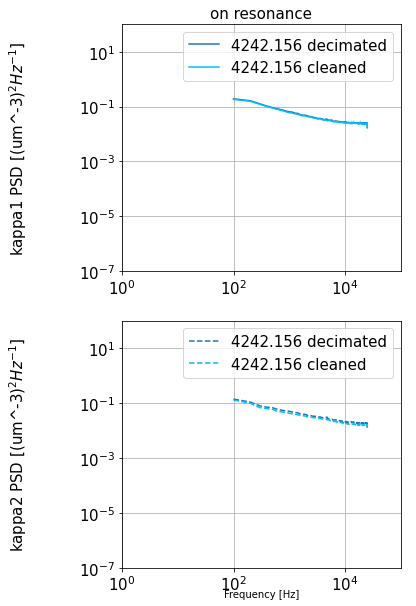

In [8]:
powers, PSDs, res, timestreams = Thf.CleanPSDs(tone_files[0], vna_file, f_transient=0.075,
                                               charFs = avg_frqs,
                                               charZs = avg_S21s,
                                               MBresults = MB_fit_vals)

In [9]:
PSDs.keys()

dict_keys(['f', 'radius', 'arc', 'radius uncleaned', 'arc uncleaned', 'fractional radius', 'fractional arc', 'dissipation uncleaned', 'frequency uncleaned', 'dissipation', 'frequency', 'kappa_1', 'kappa_2', 'kappa_1 uncleaned', 'kappa_2 uncleaned'])

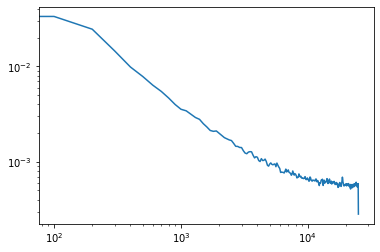

In [10]:
plt.loglog(PSDs['f'],PSDs['kappa_1'])

## Now package it all together

Line Delay file:  /data/USRP_Noise_Scans/20220526/20220526_153840/USRP_Delay_20220526_153840.h5
VNA scan file:    /data/USRP_Noise_Scans/20220526/20220526_153840/USRP_VNA_20220526_153840.h5
Timestream files: ['/data/USRP_Noise_Scans/20220526/20220526_153840/USRP_Noise_20220526_153840_delta0.h5']
Summary file:	 /data/USRP_Noise_Scans/20220526/20220526_153840/noise_averages_20220526_153840.h5
Will separate data into  1000 chunks to achieve the requested 1.00e+02  Hz low  end of the PSD
Additional decimation by 20 needed to achieve the requested 5.00e+04  Hz high end of the PSD
Will convert to resonator basis!
doing additional decimation
sampling frequency plugged into welch is 50000
pulse time data already exists! If you set override=False, nothing will happen.
saving pulse time data to /data/USRP_Noise_Scans/20220526/20220526_153840/USRP_Noise_20220526_153840_delta0.h5 because override=True!
found 141 pulses
chunk length plugged into welch is 500
chunked data into 1000 timestreams
compu

KeyError: 'kappa_1'

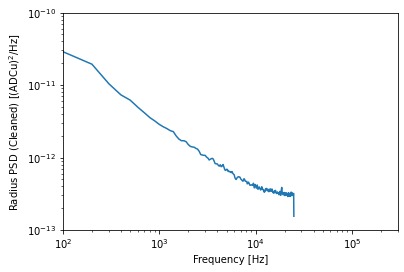

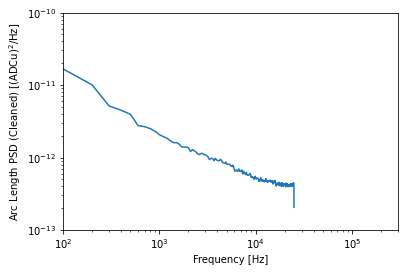

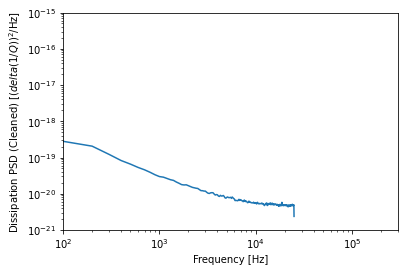

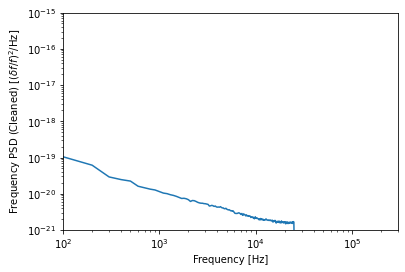

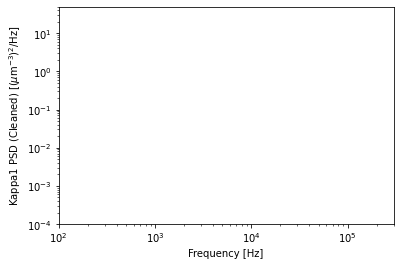

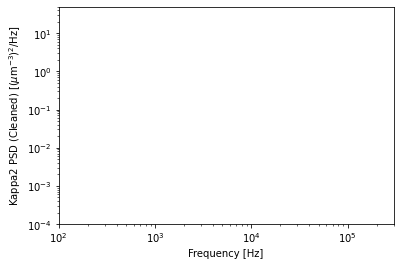

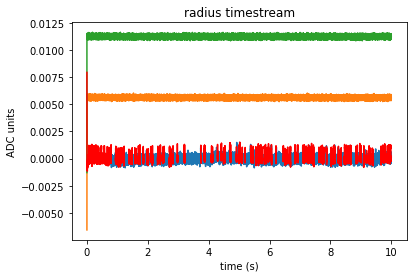

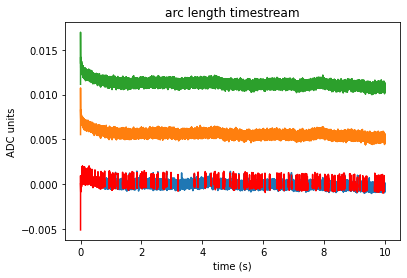

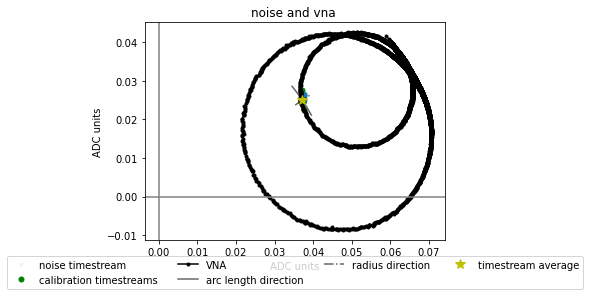

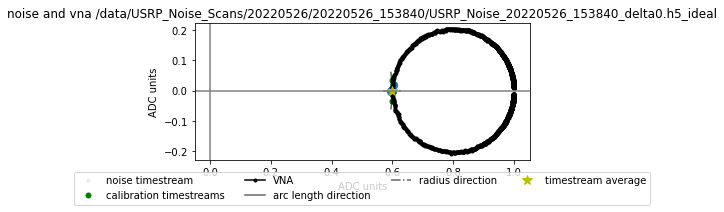

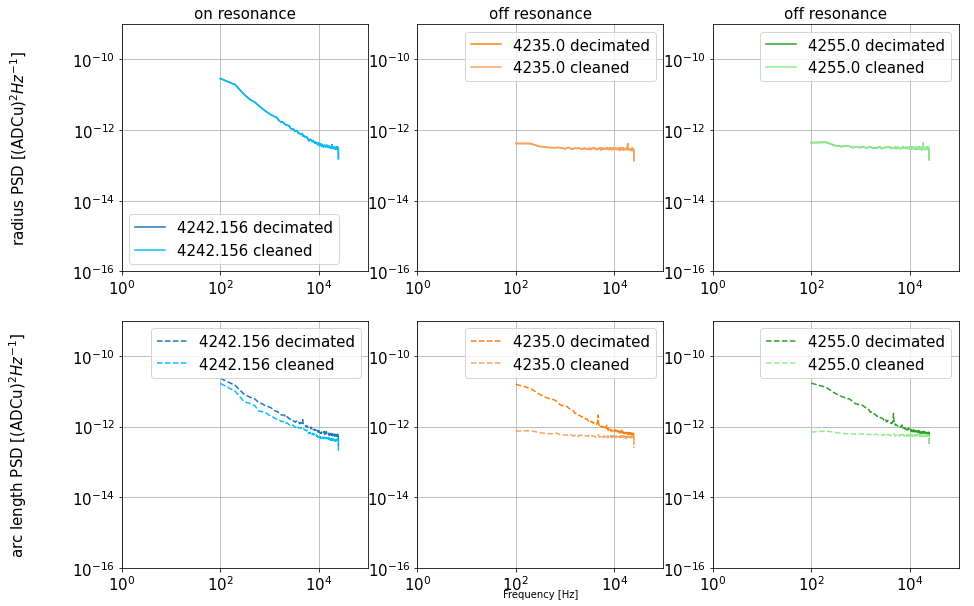

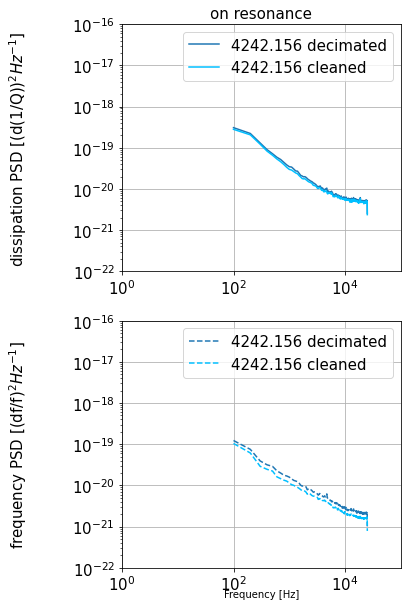

In [12]:
Thf.PlotPSDsByPower(series_list, powers_list, fHz_range = [1e2,3e5], \
	e_b_PSDrange = [1e-13,1e-10], r_b_PSDrange = [1e-21,1e-15], \
	q_b_PSDrange = [1e-4,5e1], MB_fit_result=MB_fit_vals)